[View in Colaboratory](https://colab.research.google.com/github/joheras/CLoDSA/blob/master/notebooks/CLODSA_left_right.ipynb)

# Augmenting a dataset for object classification modifying the class

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to object classification by applying transformations that modify the class of the object. To this aim, we will use a toy dataset of people looking to the left and to the right, and we will apply transformations that change the direction where people is looking. Such a dataset can be downloaded using the following command. 

In [1]:
!wget https://www.dropbox.com/s/5ztwh16xemd3vih/leftright.zip?dl=0 -O leftright.zip
!unzip leftright.zip

--2019-01-18 18:24:43--  https://www.dropbox.com/s/5ztwh16xemd3vih/leftright.zip?dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 162.125.68.1, 2620:100:6024:1::a27d:4401
Conectando con www.dropbox.com (www.dropbox.com)[162.125.68.1]:443... conectado.
Petición HTTP enviada, esperando respuesta... 301 Moved Permanently
Ubicación: /s/raw/5ztwh16xemd3vih/leftright.zip [siguiente]
--2019-01-18 18:24:44--  https://www.dropbox.com/s/raw/5ztwh16xemd3vih/leftright.zip
Reutilizando la conexión con www.dropbox.com:443.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://uc19b0e1efdd1767bd5b3b89774b.dl.dropboxusercontent.com/cd/0/inline/AZqYGQtXlQm_VIUSzsjIyBLm-krORG7QuLsnb9gegiDiY8SofQzysaFLovLzDxt10gsNwWe1T-cuNLUAvrmEx3P3gSBfujy_A6J3ZsV5LFW4sKs3JQuhqn5nMXB0RPjyddP0Qbt49fd65S1bcFwdMSDYlp_UjBYHELecSzIidYOW006qYwulqTqjMwR60Fu6-QE/file# [siguiente]
--2019-01-18 18:24:44--  https://uc19b0e1efdd1767bd5b3b89774b.dl.dropboxusercontent.com/cd/0/inline/AZqYGQtXlQm_VIUSzsjIyBLm

We can check the amount of images in each one of the folders.

In [2]:
print("Number of images in left folder")
!ls leftright/left/ | wc -l
print("Number of images in right folder")
!ls leftright/right/ | wc -l

Number of images in left folder
4
Number of images in right folder
3


## Augmentation techniques

We will apply two techniques, a horizontal flip that changes the annotation and a gaussian filter that does not. 

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [22]:
!pip install clodsa

  Running setup.py bdist_wheel for clodsa ... done
  Stored in directory: /home/jonathan/.cache/pip/wheels/73/0b/bb/82df3b0c11143217c85ed77adb4ea35a4087847f86a7d59de2
Successfully built clodsa
  Found existing installation: clodsa 1.2.15
    Uninstalling clodsa-1.2.15:
      Successfully uninstalled clodsa-1.2.15


## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA.

In [3]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

Using TensorFlow backend.


## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in a classification problem

In [4]:
PROBLEM = "classification"

_The annotation mode_. The annotation is provided by the name of the folder containing the image. 

In [5]:
ANNOTATION_MODE = "folders"

_The input path_. The input path containing the images. 

In [6]:
INPUT_PATH = "leftright/"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [7]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called augmented_images.  

In [8]:
OUTPUT_MODE = "folders"
OUTPUT_PATH= "augmented_images_leftright/"

Using the above information, we can create our augmentor object. 

In [9]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



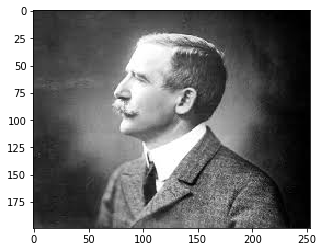

In [10]:
img = cv2.imread("leftright/left/1.jpeg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

First of all, we must define a transformer generator.

In [11]:
transformer = transformerGenerator(PROBLEM)

#### Horizontal flip

The vertical flip changes the annotation, so we must provide a dictionary with the label changes.

In [12]:
vFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(vFlip,{"left":"right","right":"left"}))

Showing the result of applying the transformation.

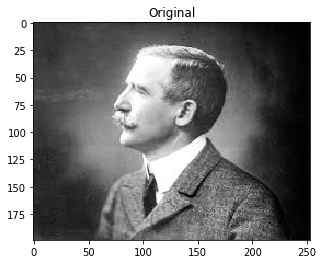

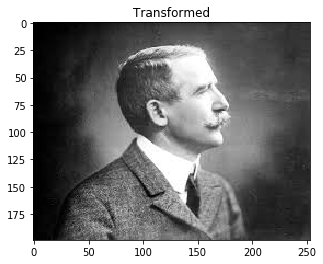

In [13]:
imgFlip = vFlip.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgFlip[:,:,::-1])

#### Gaussian blur
As this technique does not alter the annotations, we do not need to provide that information.

In [14]:
gBlur = createTechnique("gaussian_blur", {"kernel" : 5})
augmentor.addTransformer(transformer(gBlur))

Showing the result of applying the transformation.

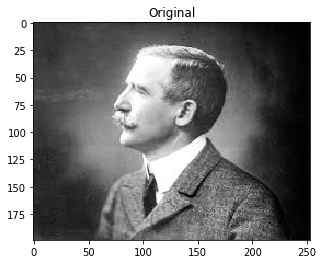

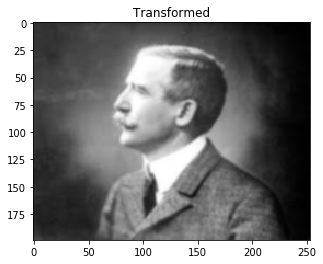

In [15]:
imgBlur = gBlur.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgBlur[:,:,::-1])

#### None
(to keep also the original image)

In [16]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

Showing the result of applying the transformation.

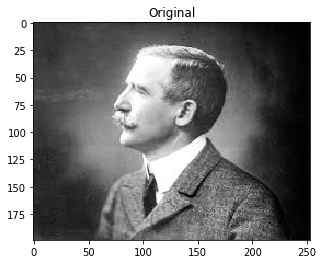

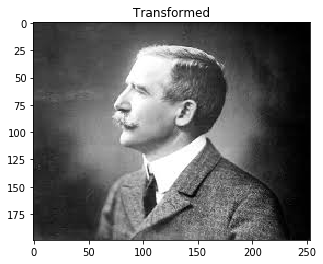

In [17]:
noneImg = none.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(noneImg[:,:,::-1])

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [18]:
augmentor.applyAugmentation()

Finally, we can check the amount of images in the output folder.

In [19]:
print("Number of images in left folder")
!ls augmented_images_leftright/left/ | wc -l
print("Number of images in right folder")
!ls augmented_images_leftright/right/ | wc -l

Number of images in left folder
11
Number of images in right folder
10


If you are executing this notebook in Colaboratory, you need to download the generated files. To that aim, you can create a zip folder and download it using the following commands. 

In [0]:
!zip -r augmented_images_leftright.zip augmented_images_leftright
from google.colab import files
files.download('augmented_images_leftright.zip')